In [1]:
from __future__ import division
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import optimize

K_a0 = 1.38629436112
K_a1 = 0.09666344259
K_a2 = 0.03590092383
K_a3 = 0.03742563713
K_a4 = 0.01451196212

K_b0 = 0.5
K_b1 = 0.12498593597
K_b2 = 0.06880248576
K_b3 = 0.03328355346
K_b4 = 0.00441787012

E_a1 = 0.44325141463
E_a2 = 0.06260601220
E_a3 = 0.04757383546
E_a4 = 0.01736506451

E_b1 = 0.24998368310
E_b2 = 0.09200180037
E_b3 = 0.04069697526
E_b4 = 0.00526449639

def K(m):
    m1 = 1 - m**2
    return (K_a0 + K_a1*m1 + K_a2*m1**2 + K_a3*m1**3 + K_a4*m1**4) + (K_b0 + K_b1*m1 + K_b2*m1**2 + K_b3*m1**3 + K_b4*m1**4)*math.log(1/m1)

def E(m):
    m1 = 1 - m**2
    return (1 + E_a1*m1 + E_a2*m1**2 + E_a3*m1**3 + E_a4*m1**4) + (E_b1*m1 + E_b2*m1**2 + E_b3*m1**3 + E_b4*m1**4)*math.log(1/m1)

def D(m):
    m2 = math.sqrt(1-m**2)
    lamb = math.log(4/m2)
        
    #if abs(K(m) - E(m)) > 1e-6:
    return (K(m) - E(m))/m**2
    #else:
    return lamb - 1 + 3/4*(lamb - 4/3)*m2**2 + 45/64*(lamb - 41/30)*m2**4 

print(K(0.999999)) 
print(E(0))     
print(D(0.999999))    

7.947479773353086
1.5707963268
6.94748622106069


In [55]:
print(initial_approx)

[  2.00285522  13.09797702  13.02298429  12.95782129  12.89141902
  12.81991984  12.74162723  12.65573472  12.56187946  12.45995102
  12.34999737  12.23217333  12.10670981  11.97389384  11.83405477
  11.68755413  11.53477766  11.37612901  11.21202433  11.04288777
  10.8691475   10.69123224  10.50956826  10.32457666  10.13667108
   9.94625566   9.75372329   9.55945416   9.36381452   9.1671557
   8.96981329   8.77210661   8.57433824   8.37679384   8.17974198
   7.98343422   7.78810522   7.593973     7.40123928   7.21008983
   7.020695     6.83321016   6.64777629   6.46452055   6.28355687
   6.10498657   5.92889896   5.75537198   5.58447278   5.41625839
   5.25077621   5.0880647    4.92815384   4.77106573   4.61681508
   4.4654097    4.31685098   4.17113434   4.02824963   3.88818152
   3.7509099    3.61641019   3.48465369   3.35560785   3.22923657
   3.10550042   2.98435691   2.86576067   2.74966363   2.63601522
   2.52476253   2.41585039   2.30922155   2.20481676   2.10257483
   2.002432

Длина эллипсоида: 3.1415926536
1.0
Длина эллипсоида: 3.300542516261554
1.1
Длина эллипсоида: 3.4628955979404417
1.2
Длина эллипсоида: 3.6282144875462863
1.3
Длина эллипсоида: 3.7961369162300005
1.4
Длина эллипсоида: 3.966359879200255
1.5
Длина эллипсоида: 4.138627560692521
1.6
Длина эллипсоида: 4.312722202970136
1.7
Длина эллипсоида: 4.4884570860608255
1.8
Длина эллипсоида: 4.665671045072357
1.9
Длина эллипсоида: 4.844224133719964
2.0


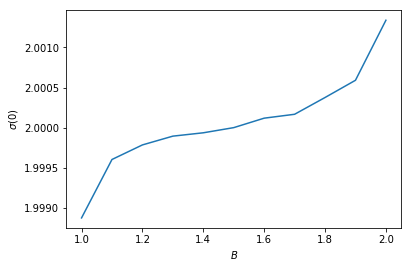

In [7]:
def nosik(B):
    epsilon = 0.00001
    n = 100

    A = 1. # B >= A
    e = math.sqrt(1 - A**2/B**2)
    L = 2*B*E(e)
    print("Длина эллипсоида: {}".format(L))
    #L = math.pi
    ka = math.sqrt((B**2 - A**2)/B**2)


    ksises = np.linspace(0, L, num=n)
    #sigma = initial_approx.copy()
    sigma = 3*np.cos(ksises)
    #sigma = np.linspace(0, L, num=n)

    def E_incomp(fi, k):
        b_0 = 1 - 2/math.pi*E(k)
        b_1 = b_0 - 1/4*k**2
        b_2 = b_1 - 3/64*k**4

        return 2/math.pi*E(k)*fi - math.sin(fi)*math.cos(fi)*(b_0 + 2/3*b_1*math.sin(fi)**2 + 8/15*b_2*math.sin(fi)**4)


    def f(tetta, ksi):
        return B*(E(ka) - E_incomp(math.pi/2 - tetta, ka)) - ksi

    tettas = []
    for ksi in ksises:
        tettas.append(optimize.fsolve(f, 0, args = (ksi))[0])


    def r(l):
        return A*math.sin(tettas[l])

    def r_tetta(l):
        return A*math.cos(tettas[l])

    def r_ksi(l):
        dksi_dtetta = B*math.sqrt(1 - ka**2*math.cos(tettas[l])**2)
        return r_tetta(l)*(1/dksi_dtetta)

    def z(l):
        return B*(1-math.cos(tettas[l]))

    def z_tetta(l):
        return B*math.sin(tettas[l])

    def z_ksi(l):
        dksi_dtetta = B*math.sqrt(1 - ka**2*math.cos(tettas[l])**2)
        return z_tetta(l)*(1/dksi_dtetta)


    def a(i, j):
        return (r(i)*z_ksi(i) - z(i)*r_ksi(i) + z(j)*r_ksi(i))*r(j)

    def b(i, j):
        return r(j)**2*z_ksi(i)

    def c(i, j):
        return r(i)**2 + r(j)**2 + (z(i) - z(j))**2

    def d(i, j):
        return 2*r(i)*r(j)

    def K_0(i, j):
        if abs(r(i)) < epsilon and abs(r(j)) < epsilon:
            return 2*math.pi
        elif abs(c(i, j) - d(i, j)) < epsilon: #or (c(i,j) + d(i,j)) < epsilon:
            return 0
        elif d(i,j) < epsilon:
            d_ksi = L/(n-1)
            return math.log(4) - d_ksi/2*(math.log(d_ksi/2) + math.log(d_ksi/2))
            #return 2*(a(i, j) - b(i, j))/c(i, j)**(3/2)*math.pi
        else:
            Ef = E(math.sqrt(abs(2*d(i, j)/(c(i, j)+d(i, j)))))
            Df = D(math.sqrt(abs(2*d(i, j)/(c(i, j)+d(i, j)))))
            return 4/math.sqrt(abs(c(i, j)+d(i, j)))*(2*b(i, j)/(c(i, j) + d(i, j))*Df + (a(i, j)-b(i, j))/(c(i, j)-d(i, j))*Ef)

    sigmaa = np.zeros(len(sigma))   

    i = 1
    sigma_prev = np.zeros(len(sigma))
    iter = 0
    while True:
        for i in range(n):
            sigmaa[i] = 0
            #sigmaa[0] = 0.5*sigma[0]
            #sigmaa[-1] = 0.5*sigma[-1]
            for j in range(n):
                #if i != j:
                    #print(i,j, K_0(i, j))
                sigmaa[i] += sigma[j]*L/(n-1)*K_0(i,j)/4/math.pi

                sigma[i] = 2*(r_ksi(i) + sigmaa[i])
        if np.linalg.norm(sigma - sigma_prev) < 0.0001 * np.sqrt(n):
            break
        iter += 1
        #if iter % 20 == 0:
        #    print("Итерация {}, норма {}".format(iter, np.linalg.norm(sigma - sigma_prev)))
        #plt.plot(sigma_prev)
        #plt.show()
        sigma_prev = sigma.copy()
        
    return sigma[0]

B = 1
B_arr = []
sigma_0 = []
for B in np.arange(1, 2.1, 0.1):
    sigma_0.append(nosik(B))
    B_arr.append(B)
    print(B)
    
plt.plot(B_arr[:], sigma_0[:])
plt.xlabel(r'$B$')
plt.ylabel(r'$\sigma(0)$')
plt.show()

In [ ]:
cos_arr = np.arange(n, dtype=float)

cosinus = 3*np.cos(ksises)

for m in range(len(sigma)):
    cos_arr[m] = sigma[m] + sigma[n-1-m] #sigma[m] + sigma[n-1-m]#math.pi-tettas[n-1-m] #r_ksi(m)**2+z_ksi(m)**2 #3*math.cos(ksises[m])

plt.plot(ksises[1:-1], cos_arr[1:-1])
plt.xlabel(r'$\xi$')
plt.ylabel(r'$\sigma[m]+\sigma[n-1-m]$')
plt.show()

plt.plot(ksises[1:-1], cosinus[1:-1])
plt.plot(ksises[1:-1], sigma[1:-1])
plt.xlabel(r'$\xi$')
plt.ylabel(r'$\sigma(\xi)$')
plt.show()

diff = np.linspace(0, L, num=n)
for i in range(len(diff)):
    diff[i] = sigma[i] - cosinus[i]

plt.plot(ksises[1:-1], diff[1:-1])
plt.xlabel(r'$\xi$')
plt.ylabel(r'$\sigma(\xi) - 3\cos\xi$')
plt.show()


#initial_approx = sigma.copy()
#print(initial_approx)

# Spheroidal approximation

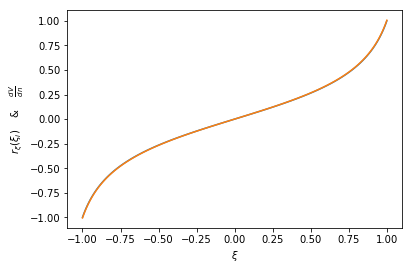

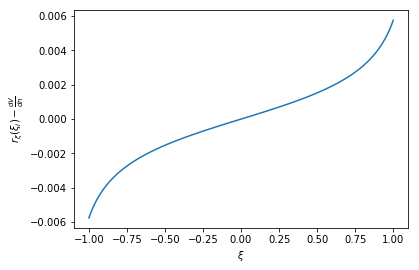

In [43]:
I = 1 / (2 * e**3)  * np.log((1 + e) / (1 - e)) - 1 / e**2  

def P(x):
    P_kvadrat = B**2 * (1 - x**2 * e**2 / A**2)**(-1)
    return P_kvadrat**0.5

def dv_dn(x):
    return 0.73 * x * P(x) / (B**2 * I)

x = A*np.cos(tettas)
y_t = np.array([dv_dn(i) for i in x])
y_r = np.array([r_ksi(i) for i in range(n)])
plt.plot(x, y_r)

plt.plot(x, y_t)
plt.xlabel(r'$\xi$')
plt.ylabel(r'$r_{\xi}(\xi_i) \quad$ & $ \quad \frac{dV}{dn}$')
plt.show()

plt.plot(x, y_t - y_r)
plt.xlabel(r'$\xi$')
plt.ylabel(r'$r_{\xi}(\xi_i) - \frac{dV}{dn}$')
plt.show()

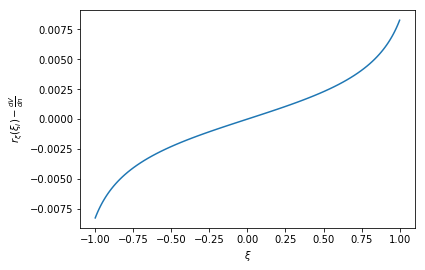

In [4]:
plt.plot(x, y_t - y_r)
plt.xlabel(r'$\xi$')
plt.ylabel(r'$r_{\xi}(\xi_i) - \frac{dV}{dn}$')
plt.show()